In [ ]:
"""
로지스틱 회귀 - 데이터가 어떤 범주에 속할 확률을 0에서 1사이로 예측 
시그모이드 함수를 이용해 로지스틱 모델 만들수 있다 
- 시그모이드 함수 : 확률을 0~1사이의 S자형 곡선 모양으로 나타내주는 함수(입력값 클수록 1, 작을수록 0 에 수렴)
로지스틱 회귀 모델로 분류기를 만들수있는데 이러한 분류기 여러개를 이용해 결과값 예측 - 소프트맥스

"""

In [ ]:
"""
추천시스템

"""

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [6]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [15]:
df1=df1.rename(columns={'movie_id':'id'})
df=pd.merge(df1,df2, on='id')

In [16]:
df

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0

In [19]:
c=df['vote_average'].mean()
c

6.092171559442016

In [22]:
m=df['vote_count'].quantile(0.9)
m   # 영화 차트에 실리기 위한 최소 투표수

1838.4000000000015

In [25]:
q_movies=df[df['vote_count'] >=m]

In [26]:
q_movies.shape

(481, 23)

In [56]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * c)         # 가중치 

In [58]:
#for문 보다는 apply 권장     
q_movies['score']=q_movies.apply(weighted_rating,axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_3536\2211122394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score']=q_movies.apply(weighted_rating,axis=1)


In [59]:
q_movies.head(1)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,score
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669


In [60]:
q_movies=q_movies.sort_values('score',ascending=False)

In [61]:
q_movies

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,score
1881,278,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,...,1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,8.059258
662,550,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,...,1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,7.939256
65,155,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,...,2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,7.920020
3232,680,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,...,1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,7.904645
96,27205,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,...,2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,44912,Green Lantern,"[{""cast_id"": 6, ""character"": ""Hal Jordan / Gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,...,2011-06-16,219851172,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,5.521697
337,47964,A Good Day to Die Hard,"[{""cast_id"": 1, ""character"": ""John McClane"", ""...","[{""credit_id"": ""5336b04a9251417db4000c80"", ""de...",92000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.diehardmovie.com/,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 591, ""nam...",en,A Good Day to Die Hard,...,2013-02-06,304654182,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,5.507643
193,82700,After Earth,"[{""cast_id"": 11, ""character"": ""Kitai Raige"", ""...","[{""credit_id"": ""52fe486f9251416c9108c631"", ""de...",130000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 4565, ""name"": ""dystopia""}]",en,After Earth,...,2013-05-30,243843127,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English"

In [64]:
pop=df.sort_values('popularity',ascending=False)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf= TfidfVectorizer(stop_words='english')

In [70]:
df['overview']=df['overview'].fillna("")
df['overview'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [71]:
tfidf_mat=tfidf.fit_transform(df['overview'])

In [73]:
tfidf_mat.shape   #4800여건의 영화와 20978 단어로 이뤄져 있음 -> 차원 축소하자(pca,svd등) #4803,10 => +배우정보,감독정보..등 추가해 코사인 유사도 구하자 

(4803, 20978)

In [ ]:
#tfidf_mat = tf(dtm) * idf 

In [74]:
from sklearn.metrics.pairwise import linear_kernel

In [75]:
cos_sim=linear_kernel(tfidf_mat, tfidf_mat)

In [76]:
cos_sim.shape

(4803, 4803)

In [77]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [78]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [80]:
df['title_x']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [82]:
indices=pd.Series(df.index, index=df['title_x']) # 영화 제목을 인덱스로 영화 제목의 번호를 데이터로

In [83]:
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [107]:
def get_recommendations(title,cosine_sim=cos_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x : x[1], reverse=True)
    #print(sim_scores)
    sim_scores=sim_scores[1:11]
    m_indices=[i[0] for i in sim_scores]
    return df['title_x'].iloc[m_indices]
    #pass

In [108]:
print(df[df['title_x']=='the Avengers']['overview'])

Series([], Name: overview, dtype: object)


In [114]:
from ast import literal_eval

In [109]:
get_recommendations("The Avengers")

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [115]:

df[['cast','crew','keywords','genres']]

for f in['cast','crew','keywords','genres']:
    df[f]=df[f].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [116]:
df['crew'].iloc[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [117]:
# df['crew'에서 'job'이 Director에 해당하는 사람의 이름 출력

In [122]:
def getDirector(data):
    for i in data:
        if i['job']=='Director':
            return i['name']
    return np.nan

In [123]:
# df['crew'에서 'job'이 Director에 해당하는 사람의 이름 출력


df['director']=df['crew'].apply(getDirector)

In [124]:
df.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Andrew Stanton


In [ ]:
# 선형대수
#pca? 데이터의 공부난 행렬 - > 고유값 분해 -> 고유벡터의 데이터를 선형변환
# 고유벡터 : pca의 주성분 벡터, 입력 데이터의 분산이 가장 큰 방향
# 고유값 : 고유벡터의 크기, 데이터 분산

#과정 
#1. 원본 데이터의 공분산 행렬
# 2. 공분산 행렬의 고유값과 고유벡터를 구함
# 3.고유값이 가장 큰 고유벡터를 추출 (축소하고자 하는 차원의 수만큼)
# 4. 고유값이 가장 큰 고유벡테를 이용하면 원본데이터를 변환한다(차원 축소한다)

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
import matplotlib.pyplot as plt

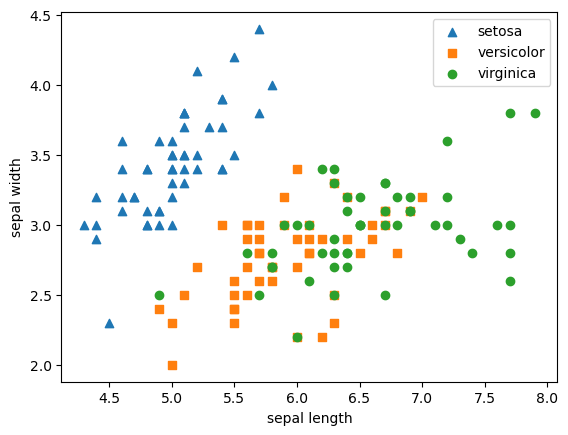

In [130]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
import matplotlib.pyplot as plt

In [131]:
from sklearn.preprocessing import StandardScaler

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [132]:
iris_f_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [133]:
#4차원 -> 2차원으로 축소 

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca=PCA(n_components=2)

In [139]:
pca.fit(iris_f_scaled)

PCA(n_components=2)

In [140]:
iris_pca=pca.transform(iris_f_scaled)

In [141]:
iris_pca.shape

(150, 2)

In [142]:
iris_f_scaled.shape

(150, 4)

In [146]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [144]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [145]:
iris_f_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [147]:
pca_columns=['pca_component_1','pca_component_2']

In [148]:
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

In [149]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


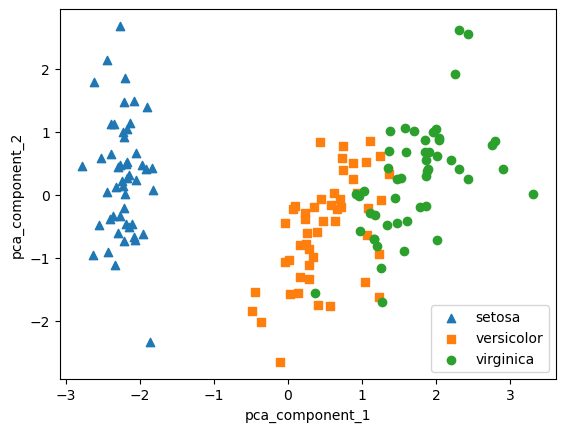

In [150]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [151]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [153]:
# 정확도 떨어짐 -> 차원을 축소했지만 정확도는 6퍼 정도만 떨어짐
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"pca 데이터 fold별 정확도: {scores}")
print(f"pca 데이터 평균 정확도: {np.mean(scores):.4f}")

pca 데이터 fold별 정확도: [0.88 0.88 0.88]
pca 데이터 평균 정확도: 0.8800


In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,0:2], iris_df.target, scoring = "accuracy", cv = 3)

print(f"sepal width,length 데이터 fold별 정확도: {scores}")
print(f"sepal width,length 데이터 평균 정확도: {np.mean(scores):.4f}")


sepal width,length 데이터 fold별 정확도: [0.72 0.76 0.68]
sepal width,length 데이터 평균 정확도: 0.7200


In [159]:
iris_df.iloc[:,0:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# Anaconda Prompt 창에서
# conda install -c conda-forge scikit-surprise

In [194]:
import surprise

In [195]:
from surprise import Dataset
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] ㅛ
Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [196]:
import numpy as np
import pandas as pd
import random

from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV

In [197]:
np.random.seed(20231030)

In [199]:
ratings_data=pd.read_csv('ratings.csv')
ratings_data

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [200]:
ratings_data['book_id']

0             1
1             1
2             1
3             1
4             1
          ...  
981751    10000
981752    10000
981753    10000
981754    10000
981755    10000
Name: book_id, Length: 981756, dtype: int64

In [201]:
len(set(ratings_data['book_id']))

10000

In [202]:
len(set(ratings_data['user_id']))

53424

In [204]:
reader=Reader(rating_scale=(1,5))  #Surprise 패캐지 

In [207]:
ratings_data
data=Dataset.load_from_df(ratings_data[['user_id','book_id','rating']],reader)

In [210]:
raw_ratings=data.raw_ratings   # None 에는 시간정보가 들어간다.
raw_ratings

[(314, 1, 5.0, None),
 (439, 1, 3.0, None),
 (588, 1, 5.0, None),
 (1169, 1, 4.0, None),
 (1185, 1, 4.0, None),
 (2077, 1, 4.0, None),
 (2487, 1, 4.0, None),
 (2900, 1, 5.0, None),
 (3662, 1, 4.0, None),
 (3922, 1, 5.0, None),
 (5379, 1, 5.0, None),
 (5461, 1, 3.0, None),
 (5885, 1, 5.0, None),
 (6630, 1, 5.0, None),
 (7563, 1, 3.0, None),
 (9246, 1, 1.0, None),
 (10140, 1, 4.0, None),
 (10146, 1, 5.0, None),
 (10246, 1, 4.0, None),
 (10335, 1, 4.0, None),
 (10610, 1, 5.0, None),
 (10944, 1, 5.0, None),
 (11854, 1, 4.0, None),
 (11927, 1, 4.0, None),
 (12471, 1, 5.0, None),
 (13282, 1, 5.0, None),
 (13544, 1, 5.0, None),
 (15494, 1, 5.0, None),
 (16377, 1, 4.0, None),
 (16913, 1, 5.0, None),
 (17434, 1, 5.0, None),
 (17663, 1, 5.0, None),
 (17984, 1, 5.0, None),
 (18031, 1, 5.0, None),
 (18313, 1, 5.0, None),
 (18361, 1, 4.0, None),
 (20076, 1, 3.0, None),
 (20467, 1, 3.0, None),
 (20848, 1, 5.0, None),
 (21228, 1, 5.0, None),
 (21487, 1, 4.0, None),
 (21713, 1, 5.0, None),
 (22602, 1,

In [211]:
len(raw_ratings)

981756

In [212]:
random.shuffle(raw_ratings) # 순서 섞어줌

In [213]:
raw_ratings

[(13034, 660, 4.0, None),
 (9843, 1389, 5.0, None),
 (29732, 109, 5.0, None),
 (10787, 5453, 4.0, None),
 (2456, 8416, 3.0, None),
 (40889, 3401, 3.0, None),
 (45517, 7347, 4.0, None),
 (4759, 5512, 4.0, None),
 (9969, 4008, 4.0, None),
 (31043, 6691, 3.0, None),
 (6281, 1249, 2.0, None),
 (5738, 9907, 3.0, None),
 (6848, 3722, 5.0, None),
 (26053, 2055, 3.0, None),
 (12219, 2901, 4.0, None),
 (22189, 5990, 4.0, None),
 (8248, 2791, 5.0, None),
 (12109, 3154, 3.0, None),
 (22650, 3685, 2.0, None),
 (36060, 1803, 5.0, None),
 (38620, 9504, 5.0, None),
 (23486, 7344, 3.0, None),
 (13391, 2920, 4.0, None),
 (32409, 2153, 4.0, None),
 (2632, 4181, 4.0, None),
 (21162, 2819, 3.0, None),
 (11885, 2321, 4.0, None),
 (33357, 1011, 5.0, None),
 (47323, 3575, 2.0, None),
 (43039, 2927, 4.0, None),
 (8599, 2775, 5.0, None),
 (36625, 950, 5.0, None),
 (43343, 1718, 2.0, None),
 (13930, 1619, 5.0, None),
 (24441, 1238, 4.0, None),
 (24647, 841, 5.0, None),
 (26100, 9306, 5.0, None),
 (39828, 9426, 

In [215]:
int(0.9*len(raw_ratings))

883580

In [217]:
train_test_split_index = int(0.9 * len(raw_ratings))  # train과 test로 나눈다

In [218]:
raw_ratings_train = raw_ratings[:train_test_split_index]
raw_ratings_test = raw_ratings[train_test_split_index:]

In [222]:
len(raw_ratings_train)  #-> 90만건으로 트레인 한다

883580

In [221]:
len(raw_ratings_test)

98176

In [223]:
raw_ratings_train

[(13034, 660, 4.0, None),
 (9843, 1389, 5.0, None),
 (29732, 109, 5.0, None),
 (10787, 5453, 4.0, None),
 (2456, 8416, 3.0, None),
 (40889, 3401, 3.0, None),
 (45517, 7347, 4.0, None),
 (4759, 5512, 4.0, None),
 (9969, 4008, 4.0, None),
 (31043, 6691, 3.0, None),
 (6281, 1249, 2.0, None),
 (5738, 9907, 3.0, None),
 (6848, 3722, 5.0, None),
 (26053, 2055, 3.0, None),
 (12219, 2901, 4.0, None),
 (22189, 5990, 4.0, None),
 (8248, 2791, 5.0, None),
 (12109, 3154, 3.0, None),
 (22650, 3685, 2.0, None),
 (36060, 1803, 5.0, None),
 (38620, 9504, 5.0, None),
 (23486, 7344, 3.0, None),
 (13391, 2920, 4.0, None),
 (32409, 2153, 4.0, None),
 (2632, 4181, 4.0, None),
 (21162, 2819, 3.0, None),
 (11885, 2321, 4.0, None),
 (33357, 1011, 5.0, None),
 (47323, 3575, 2.0, None),
 (43039, 2927, 4.0, None),
 (8599, 2775, 5.0, None),
 (36625, 950, 5.0, None),
 (43343, 1718, 2.0, None),
 (13930, 1619, 5.0, None),
 (24441, 1238, 4.0, None),
 (24647, 841, 5.0, None),
 (26100, 9306, 5.0, None),
 (39828, 9426, 

In [224]:
raw_ratings_test


[(13034, 170, 3.0, None),
 (9329, 1699, 5.0, None),
 (44975, 6245, 2.0, None),
 (32356, 6464, 4.0, None),
 (15827, 9242, 2.0, None),
 (13419, 4566, 4.0, None),
 (15337, 7660, 3.0, None),
 (42775, 9796, 5.0, None),
 (37585, 2362, 4.0, None),
 (31180, 7203, 4.0, None),
 (21599, 1155, 3.0, None),
 (41135, 8729, 5.0, None),
 (46292, 3032, 5.0, None),
 (12958, 3498, 5.0, None),
 (30180, 1539, 4.0, None),
 (13998, 4808, 4.0, None),
 (12668, 773, 3.0, None),
 (27267, 1534, 5.0, None),
 (37430, 6525, 3.0, None),
 (41764, 9652, 4.0, None),
 (27322, 755, 4.0, None),
 (11502, 2124, 3.0, None),
 (26687, 5995, 4.0, None),
 (21316, 3790, 5.0, None),
 (52540, 2967, 3.0, None),
 (32414, 9816, 3.0, None),
 (52198, 7728, 5.0, None),
 (7677, 1256, 4.0, None),
 (27187, 1294, 3.0, None),
 (4523, 2651, 5.0, None),
 (1871, 9236, 3.0, None),
 (53293, 872, 5.0, None),
 (40961, 583, 1.0, None),
 (21543, 207, 3.0, None),
 (4019, 2037, 5.0, None),
 (51818, 8321, 5.0, None),
 (11186, 8631, 5.0, None),
 (32919, 994

In [225]:
#data변수에 담긴 트레인 데이터로 훈련
data.raw_ratings = raw_ratings_train

In [226]:
#test 데이터셋 구성
test=data.construct_testset(raw_ratings_test)

In [236]:
param_grid = {
    "n_factors": [70, 55],         
    "n_epochs": [20, 30],              # 반복횟수 
    "lr_all": [0.005, 0.025, 0.125],   
    "reg_all": [0.08, 0.16, 0.32],  
    "random_state": [0],
}

In [235]:
grid_search.best_params

{'rmse': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0},
 'mae': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.08,
  'random_state': 0}}

In [237]:
grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

In [238]:
grid_search.fit(data)     # data는 data.raw_ratings=raw_ratings_train을 통해 train데이터를 학습시킨 data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.5min finished


In [239]:
best_model=grid_search.best_estimator['rmse']   #rmse이 기준으로 예측했던 평점이 가장 유사하게 나온 모델

In [240]:
best_model.predict(uid=10,iid=1000)   #10번 Id를 가지고 있는 사람,iid=책번호

Prediction(uid=10, iid=1000, r_ui=None, est=3.9458071467708815, details={'was_impossible': False})

In [241]:
testset_predictions = best_model.test(test)
accuracy.rmse(testset_predictions)

#전체 test셋에 대해 평균 rmse 출력한 결과

RMSE: 0.8243


0.8243295488167242

In [242]:
testset_predictions  # r_ui = 실제 평점 , est= 예측점수

[Prediction(uid=13034, iid=170, r_ui=3.0, est=3.3709511231649514, details={'was_impossible': False}),
 Prediction(uid=9329, iid=1699, r_ui=5.0, est=3.2209050887069726, details={'was_impossible': False}),
 Prediction(uid=44975, iid=6245, r_ui=2.0, est=3.3209451049058725, details={'was_impossible': False}),
 Prediction(uid=32356, iid=6464, r_ui=4.0, est=4.213932639169159, details={'was_impossible': False}),
 Prediction(uid=15827, iid=9242, r_ui=2.0, est=3.09168068159452, details={'was_impossible': False}),
 Prediction(uid=13419, iid=4566, r_ui=4.0, est=4.3184778121235805, details={'was_impossible': False}),
 Prediction(uid=15337, iid=7660, r_ui=3.0, est=3.976177397328831, details={'was_impossible': False}),
 Prediction(uid=42775, iid=9796, r_ui=5.0, est=4.88470653543704, details={'was_impossible': False}),
 Prediction(uid=37585, iid=2362, r_ui=4.0, est=3.38982583311712, details={'was_impossible': False}),
 Prediction(uid=31180, iid=7203, r_ui=4.0, est=4.39766323333309, details={'was_impo

In [243]:
data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [244]:
data.raw_ratings[:10]  #사용자 id, 상품 id, 평점, 시간 
#-> surprise 쓰기위한 데이터 형식

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [245]:
len(data.raw_ratings)  # ml-100k를 통해 10만건의 데이터 가져옴

100000

In [247]:
df = pd.read_csv('ml-100k.zip')
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [249]:
reader=Reader(rating_scale=(1,5))

In [250]:
df=df[['user_id','item_id','rating']]  #timestamp 뺌

In [ ]:
# df가 사용자 id, 상품 id, 평점, 시간 순서여서 바꿀필요 없음

In [251]:
data=Dataset.load_from_df(df, reader)

In [252]:
from surprise.model_selection import train_test_split

In [253]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [254]:
svd=SVD()
svd.fit(trainset)

In [255]:
pred=svd.test(testset)

In [260]:
from surprise import accuracy

In [262]:
accuracy.mae(pred)

MAE:  0.7369


0.7369304618979162

In [261]:
accuracy.rmse(pred)

RMSE: 0.9359


0.9358728743488197

In [259]:
pred[1]

Prediction(uid=371, iid=210, r_ui=4.0, est=4.147611115504261, details={'was_impossible': False})

In [258]:
testset

[(907, 143, 5.0),
 (371, 210, 4.0),
 (218, 42, 4.0),
 (829, 170, 4.0),
 (733, 277, 1.0),
 (363, 1512, 1.0),
 (193, 487, 5.0),
 (808, 313, 5.0),
 (557, 682, 2.0),
 (774, 196, 3.0),
 (638, 118, 3.0),
 (632, 81, 5.0),
 (417, 200, 4.0),
 (580, 471, 3.0),
 (640, 91, 4.0),
 (450, 328, 4.0),
 (596, 13, 2.0),
 (586, 467, 4.0),
 (653, 502, 2.0),
 (378, 517, 3.0),
 (405, 65, 1.0),
 (279, 399, 4.0),
 (327, 293, 3.0),
 (346, 276, 1.0),
 (59, 928, 4.0),
 (514, 22, 4.0),
 (807, 402, 5.0),
 (473, 327, 3.0),
 (342, 324, 1.0),
 (269, 136, 4.0),
 (654, 1, 4.0),
 (250, 28, 4.0),
 (282, 689, 2.0),
 (534, 619, 4.0),
 (194, 481, 3.0),
 (184, 118, 2.0),
 (291, 739, 3.0),
 (293, 31, 2.0),
 (943, 1028, 2.0),
 (65, 69, 3.0),
 (562, 135, 5.0),
 (466, 62, 3.0),
 (847, 317, 3.0),
 (650, 521, 3.0),
 (656, 326, 1.0),
 (366, 53, 5.0),
 (15, 280, 3.0),
 (474, 322, 4.0),
 (90, 905, 4.0),
 (503, 19, 5.0),
 (334, 1524, 4.0),
 (90, 632, 5.0),
 (406, 1118, 3.0),
 (899, 515, 3.0),
 (13, 339, 3.0),
 (430, 19, 5.0),
 (24, 729

In [263]:
# 특정 아이디에 대해서만 측정도 가능
svd.predict("371","210")

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [264]:
#문자 타입으로 불러야한다.
svd.predict(str(371),str(210))

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})